# scVelo analysis of Perturb-Seq trajectories

## Setup

### Libraries

In [1]:
import anndata
import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib as plt

### Load converted Seurat object (need to manually add UMAP)

In [2]:
%%time
adata = scv.read('/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/seurat/diff.h5ad') 
adata

CPU times: user 39.3 s, sys: 3.4 s, total: 42.7 s
Wall time: 42.7 s


AnnData object with n_obs × n_vars = 82040 × 56159
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_grna', 'nFeature_grna', 'sample', 'condition', 'UMI_count', 'z_score', 'guide_identity', 'guide_target', 'singlet_status', 'percent_mito', 'percent_ribo', 'qc_cluster', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'louvain_cluster_lo', 'louvain_cluster_mid', 'louvain_cluster_hi', 'seurat_clusters', 'leiden_cluster_lo', 'leiden_cluster_mid', 'leiden_cluster_hi', 'library', 'primary_pheno', 'primary_direction', 'diff_pheno', 'diff_hit_direction', 'low_res_cluster', 'trajectory'
    var: 'features', 'ambiguous_features', 'unspliced_features'
    layers: 'ambiguous', 'spliced', 'unspliced'

### Load UMAP data to incorporate into AnnData

In [3]:
umap = pd.read_csv("/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/seurat/diff_umap.csv")

### Add UMAP

In [4]:
umap_ordered = umap.iloc[:,1:]
adata.obsm['X_umap'] = umap_ordered.values
adata

AnnData object with n_obs × n_vars = 82040 × 56159
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_grna', 'nFeature_grna', 'sample', 'condition', 'UMI_count', 'z_score', 'guide_identity', 'guide_target', 'singlet_status', 'percent_mito', 'percent_ribo', 'qc_cluster', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'louvain_cluster_lo', 'louvain_cluster_mid', 'louvain_cluster_hi', 'seurat_clusters', 'leiden_cluster_lo', 'leiden_cluster_mid', 'leiden_cluster_hi', 'library', 'primary_pheno', 'primary_direction', 'diff_pheno', 'diff_hit_direction', 'low_res_cluster', 'trajectory'
    var: 'features', 'ambiguous_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

### Subset lineage of interest

In [5]:
#lineage = adata[(adata.obs['trajectory'] == 'NSC') | (adata.obs['trajectory'] == 'Cell Cycle'), :]
lineage = adata[(adata.obs['trajectory'] != 'Other'), :]
lineage

View of AnnData object with n_obs × n_vars = 72236 × 56159
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_grna', 'nFeature_grna', 'sample', 'condition', 'UMI_count', 'z_score', 'guide_identity', 'guide_target', 'singlet_status', 'percent_mito', 'percent_ribo', 'qc_cluster', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'louvain_cluster_lo', 'louvain_cluster_mid', 'louvain_cluster_hi', 'seurat_clusters', 'leiden_cluster_lo', 'leiden_cluster_mid', 'leiden_cluster_hi', 'library', 'primary_pheno', 'primary_direction', 'diff_pheno', 'diff_hit_direction', 'low_res_cluster', 'trajectory'
    var: 'features', 'ambiguous_features', 'unspliced_features'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

## scVelo analysis

In [6]:
%%time
scv.pp.filter_and_normalize(lineage, min_shared_counts=10, n_top_genes=3000)

Trying to set attribute `.obs` of view, copying.


Filtered out 41863 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.
CPU times: user 32.9 s, sys: 17.9 s, total: 50.7 s
Wall time: 50.7 s


In [7]:
%%time
scv.pp.moments(lineage, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:59) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:31) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
CPU times: user 9min 59s, sys: 15.8 s, total: 10min 15s
Wall time: 3min 25s


In [8]:
%%time
scv.tl.velocity(lineage)

computing velocities
    finished (0:00:31) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
CPU times: user 1min 8s, sys: 6.28 s, total: 1min 14s
Wall time: 31.3 s


In [9]:
%%time
scv.tl.velocity_graph(lineage)

computing velocity graph
    finished (0:09:39) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
CPU times: user 9min 37s, sys: 4.22 s, total: 9min 41s
Wall time: 9min 41s


In [10]:
lineage

AnnData object with n_obs × n_vars = 72236 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_grna', 'nFeature_grna', 'sample', 'condition', 'UMI_count', 'z_score', 'guide_identity', 'guide_target', 'singlet_status', 'percent_mito', 'percent_ribo', 'qc_cluster', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'louvain_cluster_lo', 'louvain_cluster_mid', 'louvain_cluster_hi', 'seurat_clusters', 'leiden_cluster_lo', 'leiden_cluster_mid', 'leiden_cluster_hi', 'library', 'primary_pheno', 'primary_direction', 'diff_pheno', 'diff_hit_direction', 'low_res_cluster', 'trajectory', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'features', 'ambiguous_features', 'unspliced_features', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'pca', 'neighbors', 'velocity_params', 'velocity_graph'

computing velocity embedding
    finished (0:00:18) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


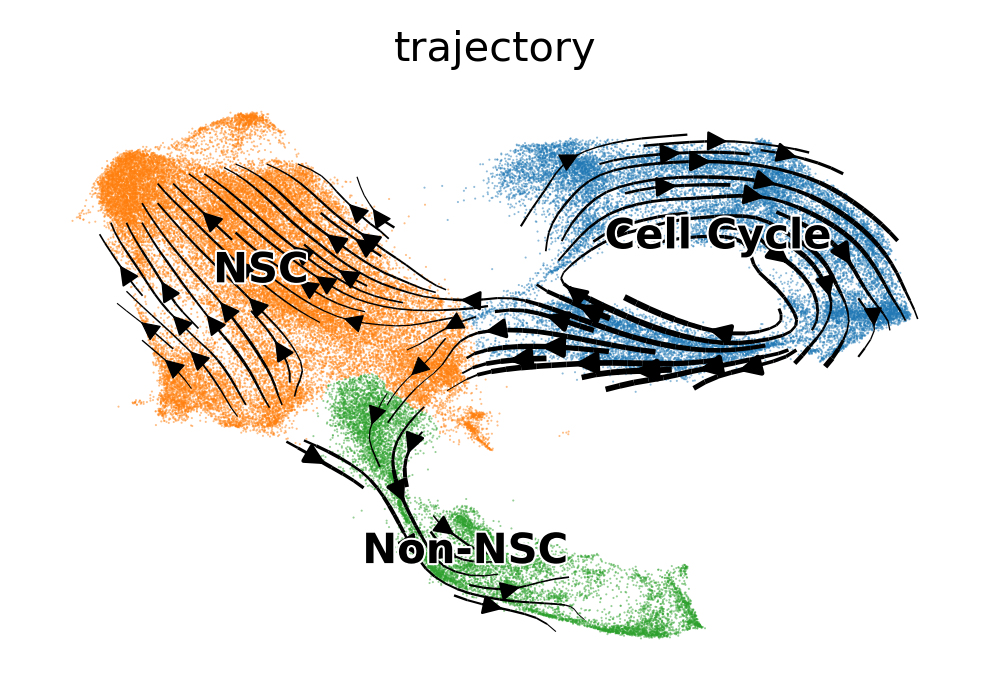

In [11]:
scv.pl.velocity_embedding_stream(lineage, basis="umap", color='trajectory', dpi = 300, figsize = (4, 2.56), size=1, alpha=0.5, linewidth = 0.8, density = 0.95, min_mass=3.5)

saving figure to file ./figures/scvelo_scvelo.png


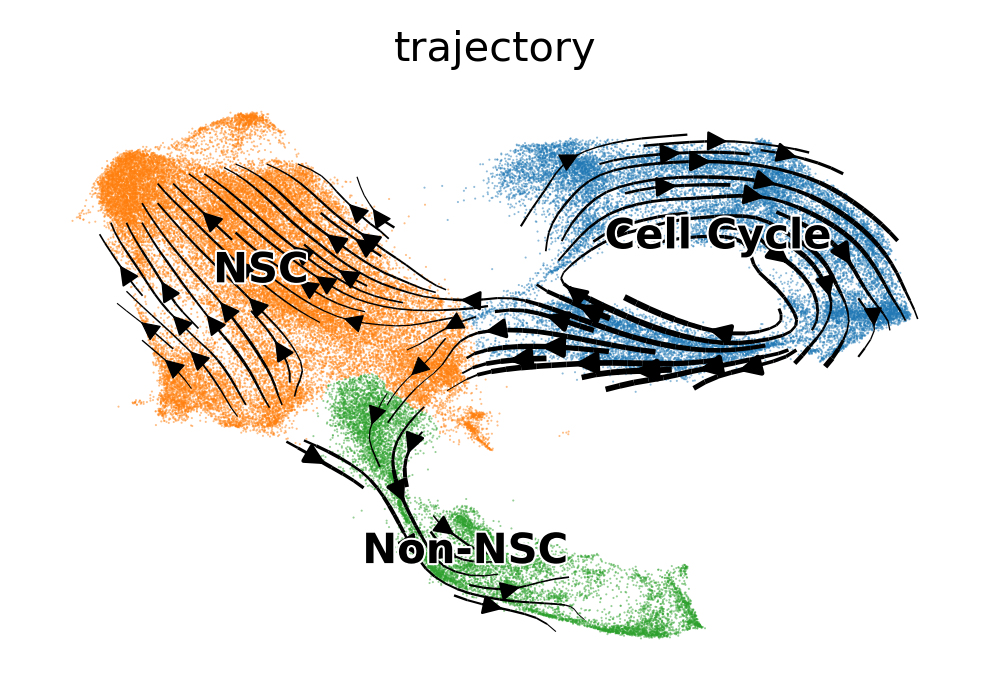

In [12]:
scv.pl.velocity_embedding_stream(lineage, basis="umap", color='trajectory', dpi = 300, figsize = (4, 2.56), size=1, alpha=0.5, linewidth = 0.8, density = 0.95, min_mass=3.5,save='scvelo.png')

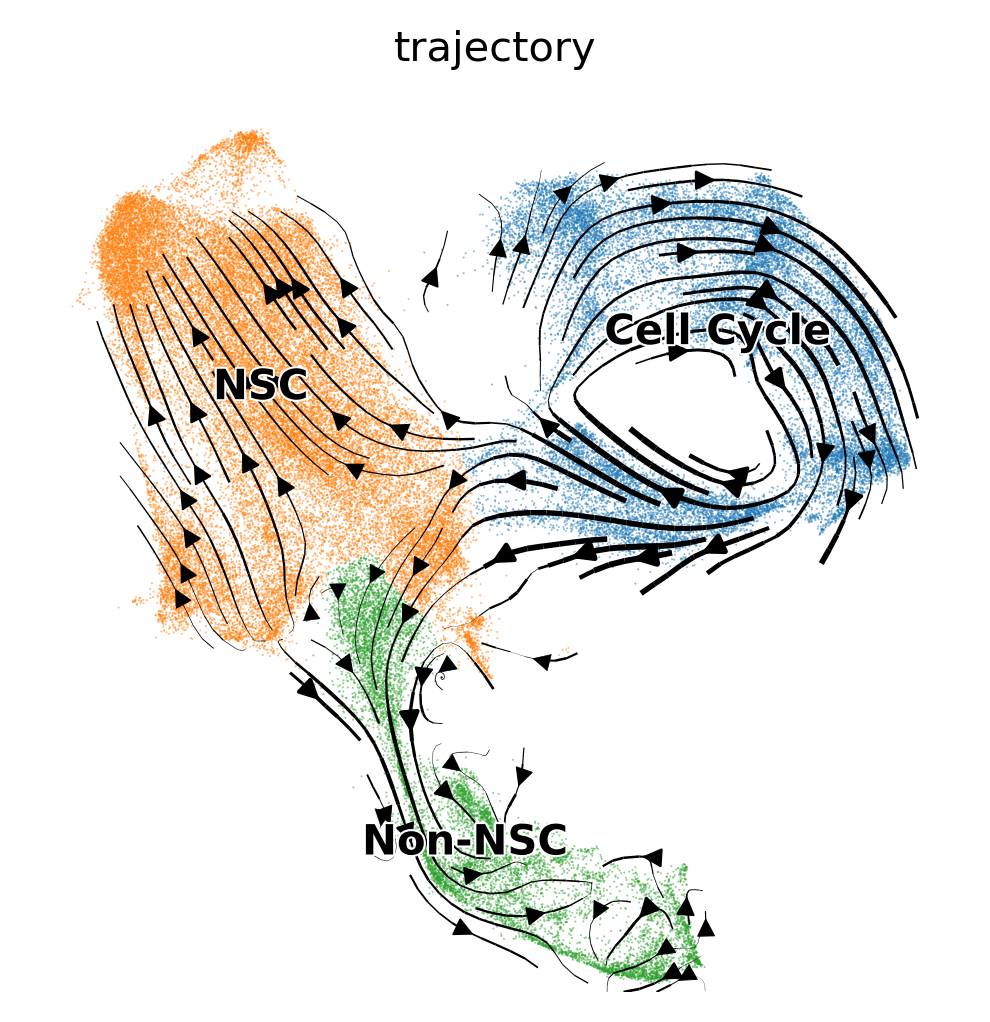

In [13]:
scv.pl.velocity_embedding_stream(lineage, basis="umap", color='trajectory', dpi = 300, figsize = (4, 4), size=1, alpha=0.5, linewidth = 0.8, density = .9, min_mass=2)

In [ ]:
scv.pl.velocity_embedding(lineage, basis="umap", color="seurat_clusters", arrow_length=3, arrow_size=2, figsize = (4, 4), dpi=300)

In [ ]:
scv.pl.velocity(lineage, ['PAX6'], dpi = 300)

In [ ]:
%%time
scv.tl.recover_dynamics(lineage, n_jobs=20)

In [ ]:
scv.tl.latent_time(lineage)
scv.pl.scatter(lineage, color='latent_time', color_map='gnuplot', size=1)

In [ ]:
scv.tl.rank_velocity_genes(lineage, groupby='seurat_clusters', min_corr=.3)

df = scv.DataFrame(lineage.uns['rank_velocity_genes']['names'])


In [ ]:
df.head(20)

In [ ]:
scv.tl.velocity_confidence(lineage)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(lineage, c=keys, cmap='coolwarm', perc=[5, 95])


In [ ]:
%%time
scv.tl.velocity_pseudotime(lineage)
scv.pl.scatter(lineage, color='velocity_pseudotime', cmap='gnuplot')

In [ ]:
top_genes = lineage.var["fit_likelihood"].sort_values(ascending=False).index[:300]
scv.pl.heatmap(lineage, var_names=top_genes, sortby="latent_time", col_color="seurat_clusters", n_convolve=100)

In [ ]:
top_genes = lineage.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(lineage, basis=top_genes[:15], ncols=5, frameon=False)

In [ ]:
var_names = ['MELK']
scv.pl.scatter(lineage, var_names, frameon=False)
#scv.pl.scatter(lineage, x='latent_time', y=var_names, frameon=False)


In [ ]:
# !pip install python-igraph --upgrade --quiet

In [ ]:
lineage.uns['neighbors']['distances'] = lineage.obsp['distances']
lineage.uns['neighbors']['connectivities'] = lineage.obsp['connectivities']

scv.tl.paga(lineage, groups='seurat_clusters')
df = scv.get_df(lineage, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

In [ ]:
scv.pl.paga(lineage, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

In [ ]:
lineage.__dict__['_raw'].__dict__['_var'] = lineage.__dict__['_raw'].__dict__['_var'].rename(columns={'_index': 'features'})

In [ ]:
lineage.write_h5ad(filename='/media/data4/shared/ipsc_manuscript/data/perturbseq/derived/seurat/diff_filtered_scvelo.h5ad')

In [ ]:
lineage

In [ ]:
lineage.layers['velocity']

In [ ]:
lineage.var['velocity_genes']

In [ ]:
velocity_layer = pd.DataFrame(lineage.layers['velocity'])
velocity_layer.columns = lineage.var['velocity_genes']
velocity_layer

In [ ]:
lineage.layers['variance_velocity']